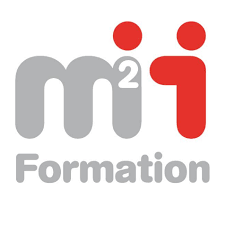

Parmi les points forts de Elasticsearch est sa capacité de recherche.

# Les bases de l'analyse textuelle

L'analyse du texte est différente de l'analyse de données des autres types tels que les nombres et les dates.L'analyse des données numériques et des dates peut être faites d'une manière plus définitive. Par exemple, si on cherche tous les enregistrements avec un prix supérieur ou égal à 50, le résultat est simple pour chaque enregistrement.

L'analyse du texte est différente puisque le texte est de nature différente.

# Analyseurs Elasticsearch

La tâche principale d'un analyseur est de prendre la valeur d'un champs et le décomposer en plusieurs mots, il permet d'extraire les termes à partir à partir des champs contenus dans chaque document. Ces termes nous aident à trouver les documents qui contiennent les termes de recherche.

L'analyseur performe ce processus de décomposition des chaînes de caractères en plusieurs termes, ceci est effectué à deux reprises:

* Lors de l'indexation
* Lors de la recherche

La tâche principale de l'analyseur est d'analyser les champs du document et construire l'indexe.

Chaque champs de type texte a besoin d'être analysé avant que le document soit indexé. Les analyseurs peuvent être configurés pour chaque champs, il est possible d'avoir deux champs text dans le même document, chacun utilisant un analyseur différent.

Elasticsearch utilise les analyseurs afin d'analyser les données textuelles, un analyseur posssède les composants suivants:

* Filtres de caractères
* Tokenizer
* Filtres de tokens

**Filtres de caractères**

Lors de la création d'un analyseur, on peut configurer un ou plusieurs filtres de caractères. Un filtre de caractères agit sur un flux de caractères à partir du champs en entrée. Chaque filtre de caractères peut ajouter, supprimer ou modifier les caractères dans le champs en entrée.

Elasticsearch possède quelques filtres de caractères qui peuvent être utilisés pour composer ou créer notre propre analyseur.

Parmi les filtres de caractères contenus dans Elasticsearch, on trouve le filtre Mapping Char. Il relie un caractère ou une séquence de caractères avec des caractères cibles.

Par exemple, il est possible de transformer les émoticones en un texte qui les représente:

* :) doit être traduite vers _smile_
* :( doit être traduite vers _sad_
* :D doit être traduite vers _laugh_

**Tokenizer**

Un analyseur possède un seul tokenizer. La responsabilité d'un tokenizer est de recevoir un stream de caractères et de générer un stream de tokens. Ces tokens sont utilisés pour construire une indexe inversée. Un token est presque équivalent à un mot. En plus de décomposer les caractères en mots ou tokens, il produit également à la sortie l'indice de début et de fin de chaque token dans le flux d'entrée.

Plusieurs tokenizers contenus dans Elasticsearch peuvent être utilisés afin de composer un analyseur personnalisé, ces tokenizers sont également utilisés par Elasticsearch pour composer ses analyseurs.

Standard Tokenizer est l'un des tokenizers les plus utilisés comme il est adapté pour plusieurs langages. Il utilise les caractères blancs et la ponctuation pour décomposer un flux en entrée.

```
POST _analyze
{
  "tokenizer": "standard",
  "text": "Tokenizer breaks characters into tokens!"
}
```

**Filtres de tokens**

Il peut y avoir zéro ou plusieurs filtres de tokens dans un analyseur. Chaque filtre peut ajouter, supprimer ou modifier les tokens dans le flux d'entrée qu'il reçoit. Puisqu'il est possible d'avoir plusieurs filtres de tokens dans un analyseur, la sortie de chaque filtre est envoyée au suivant.

Elasticsearch possède plusieurs filtres de tokens et peuvent être utilisés pour composer nos propres analyseurs:

* Filtre tokens lowercase: remplace tous les tokens avec leurs équivalents en minuscules
* Filtre anti-dictionnaire: supprimes les mots anti-dictionnaire de l'entrée.


**Utilisation des analyseurs intégrés**

Elasticsearch possède plusieurs analyseurs intégrés qui peuvent être utilisés directement. La plupart de ces analyseurs fonctionnent sans configuration:

* Analyseur Standard: L'analyseur par défaut de Elasticsearch.
* Analyseurs des langages: Chaque langage possède ses règles grammaticales.

**Analyseur Standard**

L'analyseur standard est adapté pour plusieurs langages et situations. Il peut être aussi personnalisé pour un langage ou une sitatuation, il est composé des composants suivants:

* Standard tokenizer: Il décompose le texte en plusieurs tokens en utilisant les caractères blancs comme séparateurs.
* Filtre de tokens:
  - standard token filter: réservé pour les versions ultérieurs "placeholder"
  - lowercase token filter: transforme les tokens en minuscules
  - stop token filter: supprime les mots anti-dictionnaire "stopwords" spécifiés



```
PUT index_standard_analyzer
{
  "settings": {
    "analysis": {
      "analyzer": {
        "std": { 
          "type": "standard"
        }
      }
    }
  },
  "mappings": {
    "properties": {
      "my_text": {
        "type": "text",
        "analyzer": "std"
      }
    }
  }
}
```

La commande permet de créer l'analyseur index_standard_analyzer:
* settings permet de définir explicitement un seul analyseur avec le nom std, le type de l'analyseur est **standard**.
* mappings permet de créer un seul type _doc dans l'indexe avec un seul champs my_text.

On peut utiliser _analyze pour analyser un texte:

```
POST index_standard_analyzer/_analyze
{
  "field": "my_text", 
  "text": "The Standard Analyzer works this way."
}
```

Par défaut, standard analyzer est appliqué et aucune liste anti-dictionnaire n'est utilisé.

On peut spécifier une liste ```_english``` en utilisant la commande suivante:

```
PUT index_standard_analyzer_english_stopwords
{
  "settings": {
    "analysis": {
      "analyzer": {
        "std": { 
          "type": "standard",
          "stopwords": "_english_"
        }
      }
    }
  },
  "mappings": {
    "properties": {
      "my_text": {
        "type": "text",
        "analyzer": "std"
      }
    }
  }
}
```

On peut également spécifier une liste de mots à la place de la classe ```_english_```.

On peut tester l'analyseur crée à travers la commande:

```
POST index_standard_analyzer_english_stopwords/_analyze
{
  "field": "my_text", 
  "text": "The Standard Analyzer works this way."
}
```


# Recherche des données structurées

**Range**

Les requêtes range peuvent être appliquées sur les champs avec des types de données qui ont un ordre défini, par exemple integers, logs et dates.

```
GET /amazon_products/_search
{
  "query": {
    "range": {
      "price": {
        "gte": 10,
        "lte": 20
      }
    }
  }
}
```

On peut également l'appliquer pour les dates:

```
GET /orders/_search
{
    "query": {
        "range" : {
            "orderDate" : {
                "gte": "01/09/2017",
                "lte": "30/09/2017",
                "format": "dd/MM/yyyy"
            }
        }
    }
}
```

On peut également utiliser des termes spéciaux comme **now** pour dénoter la date du jour:

```
GET /orders/_search
{
    "query": {
        "range" : {
            "orderDate" : {
                "gte": "now-7d",
                "lte": "now"
            }
        }
    }
}
```


**Exists**

Permet de retourner les documents qui ont un champ non null et non vide:

```
GET /amazon_products/_search {
  "query": {
    "exists": {
      "field": "description"
    }  
  }
}
```

**Term**

Les requêtes term permettent de chercher un contenu texte exact dans les champs.

```
GET /amazon_products/_search
{
  "query": {
    "term": {
      "manufacturer.raw": "victory multimedia"
    }
  }
}
```

# Recherche textuelle

Les recherches textuelles s'appliquent aux champs non structurés. Ces requêtes utilisent le processus d'analyse où l'analyseur est appliqué sur les termes de la requête.

**Match**

Si **match** est appliqué sur un champ keyword, la recherche est effectué sur le terme sans analyse:

```
GET /amazon_products/_search
{
  "query": {
    "match": {
      "manufacturer.raw": "victory multimedia"
    }
  }
}
```

La requête est converti à une requête **term**:

```
GET /amazon_products/_search
{
  "query": {
    "term": {
      "manufacturer.raw": "victory multimedia"
    }
  }
}
```

Si la requête est appliqué sur un champ text:

```
GET /amazon_products/_search
{
  "query": {
    "match": {
      "manufacturer": "victory multimedia"
    }
  }
}
```


**Operator**

Par défaut, la recherche textuelle avec match utilise l'opérateur **or** pour combiner combiner les résultats, on peut utiliser l'opérateur **and** également:

```
GET /amazon_products/_search {
  "query": {
    "match": {
      "manufacturer": {
        "query": "victory multimedia",
        "operator": "and"
      }
    }  
  }
}
```

**Minimum shoud match**

On peut également spécifier combien de termes doivent matcher:

```
GET /amazon_products/_search
{
  "query": {
    "match": {
      "manufacturer": {
        "query": "victory multimedia",
        "minimum_should_match": 2
      }
    }
  }
}
```

**Fuzziness**

On peut utiliser le paramètre fuzziness pour transformer la requête en une requête fuzzy, elle se base sur la distance de Levenshtein "edit distance" pour convertir un terme vers un autre en utilisant une série de modifications (insertions, suppressions, substitutions), le paramètre fuzziness peut prendre l'une des valeur 0, 1, 2, AUTO.

```
GET /amazon_products/_search {
  "query": {
    "match": {
      "manufacturer": {
        "query": "victor multimedia",
        "fuzziness": 1
      }
    }  
  }
}
```

**Match phrase**

Pour matcher une séquence de termes au lieu des termes individuels, on peut utiliser match_phrase:

```
GET /amazon_products/_search
{
  "query": {
    "match_phrase": {
      "description": {
        "query": "real video saltware aquarium"
      }
    }
  }
}
```

Les requêtes match_phrase acceptent un paramètre slop qui permet de spécifier le nombre de mots qu'on peut ignorer:

```
GET /amazon_products/_search
{
  "query": {
    "match_phrase": {
      "description": {
        "query": "real video aquarium",
        "slop": 1
      }
    }
  }
}
```


**Multi match**

La requête multi match est une extension de la requête match qui permet d'exécuter la requête sur plusieurs champs.

```
GET /amazon_products/_search
{
  "query": {
    "multi_match": {
      "query": "monitor aquarium", 
      "fields": ["title", "description"]
    }
  }
}
```

On peut utiliser booster un champ:

```
GET /amazon_products/_search {
  "query": {
    "multi_match": {
      "query": "monitor aquarium",
      "fields": ["title^3", "description"]    
    }  
  }
}
```

# Requêtes composées

**constant score**

```
GET /amazon_products/_search
{
  "query": {
    "constant_score": {
      "filter": {
        "term": {
          "manufacturer.raw": "victory multimedia"
        }
      }
    }
  }
}
```

On peut utiliser le paramètre boost pour affecter un score donné:

```
GET /amazon_products/_search
{
  "query": {
    "constant_score": {
      "filter": {
        "term": {
          "manufacturer.raw": "victory multimedia"
          
        }
      },
      "boost": 1.2
    }
  }
}
```

**Bool**

Les requêtes booléennes permettent de combiner plusieurs requêtes:

```
GET /amazon_products/_search
{
  "query": {
    "constant_score": {
      "filter": {
        "bool": {
          "should": [
            {
              "range": {
                "price": {
                  "gte": 10,
                  "lte": 13
                }
              }
            },
            {
              "term": {
                "manufacturer.raw": {
                  "value": "valuesoft"
                }
              }
            }
        }
      }
    }
  }
}
```
On peut ajouter des conditions NOT:

```
GET /amazon_products/_search
{
  "query": {
    "constant_score": {
      "filter": {
        "bool": {
          "must": [
            {
              "range": {
                "price": {
                  "gte": 10,
                  "lte": 20
                }
              }
                   }
          ],
          "must_not": [
            {
              "term": {
                "manufacturer.raw": "encore"
              }
            }
          ]
        }
      }
    }
  }
}
```
